# The Derivative

### Charlie Bailey (peba2926)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Section 3.2

### Problem 1

*Code structure below adapted from Week 2 plotting activities and Christopher Taylor's post on Piazza*

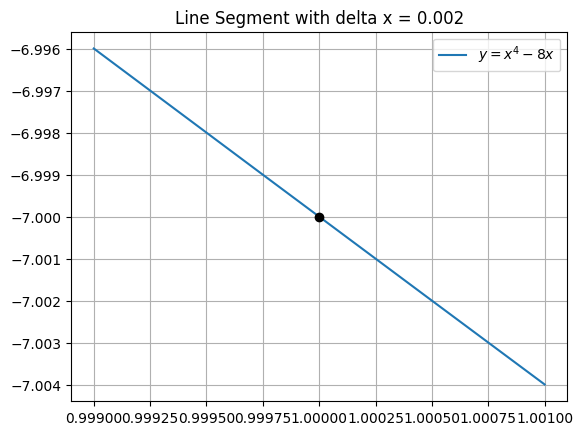

Slope of $y = x^4 - 8x$ at 1:::  -3.999996000000335


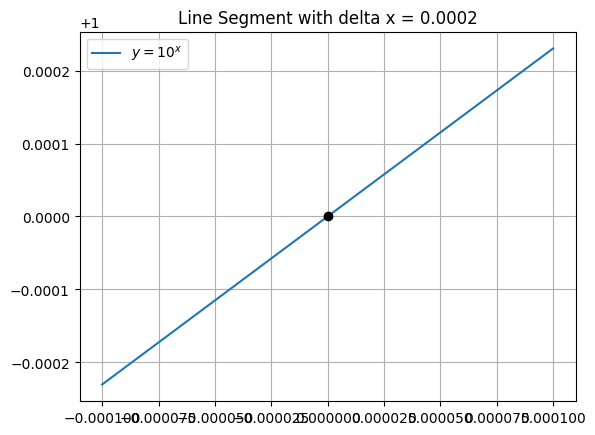

Slope of $y = 10^x$ at 0:::  2.302585113340694


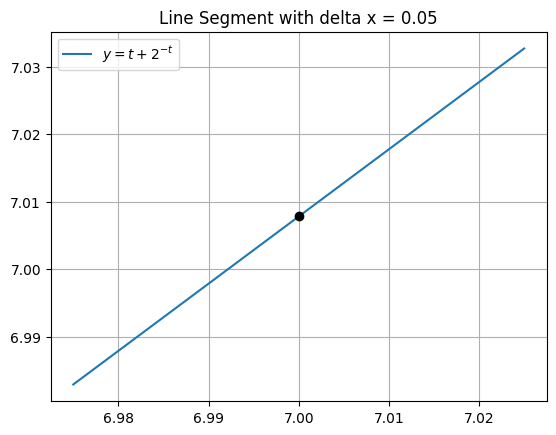

Slope of $y = t + 2^{-t}$ at 7:::  0.9945845166316439


In [10]:
def slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

def f_at(f, x):
    return f(x)

def calc_derivative(f, x, delta_x, f_str, granularity=1000):
    x1 = x - (delta_x/2)
    x2 = x + (delta_x/2)

    x_points = np.linspace(x1, x2, granularity)
    y_points = f_at(f, x_points)

    plt.plot(x_points, y_points, label=f_str)
    plt.plot(x, f_at(f, x), 'ko')
    plt.grid(True)
    plt.title(f"Line Segment with delta x = {delta_x}")
    plt.legend()
    plt.show()

    slope_est = slope(x1, f(x1), x2, f(x2))
    print(f"Slope of {f_str} at {x}::: ", slope_est)

# 1a
x_a = 1
deltax_a = 0.002
f_str_a = r'$y = x^4 - 8x$'

def f_a(x):
    return x**4 - 8*x

calc_derivative(f_a, x_a, deltax_a, f_str_a)

# 1b
x_b = 0
deltax_b = 0.0002
g_str_b = r'$y = 10^x$'

def g_b(x):
    return 10**x

calc_derivative(g_b, x_b, deltax_b, g_str_b)

# 1c
t_c = 7
deltat_c = 0.05
y_str_c = r'$y = t + 2^{-t}$'

def y_c(t):
    return t + 2**(-t)

calc_derivative(y_c, t_c, deltat_c, y_str_c)

### Problem 2 a)

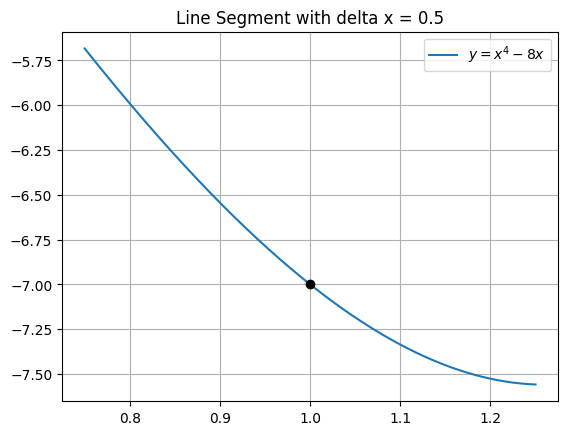

Slope of $y = x^4 - 8x$ at 1:::  -3.75


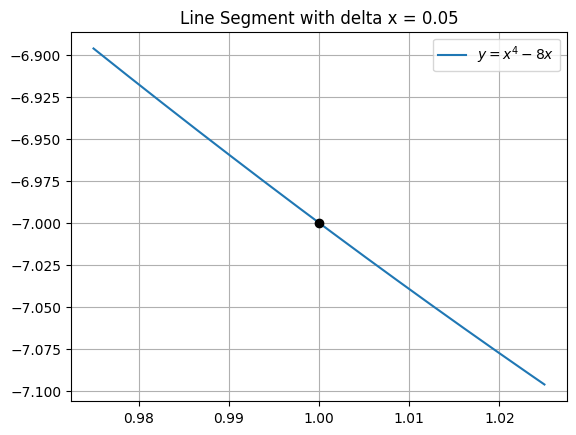

Slope of $y = x^4 - 8x$ at 1:::  -3.9975000000000147


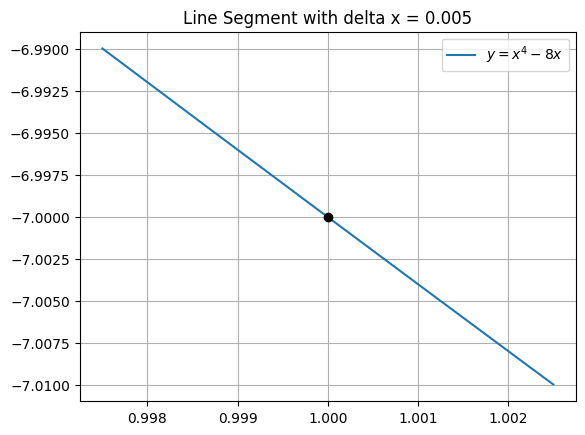

Slope of $y = x^4 - 8x$ at 1:::  -3.999975000000063


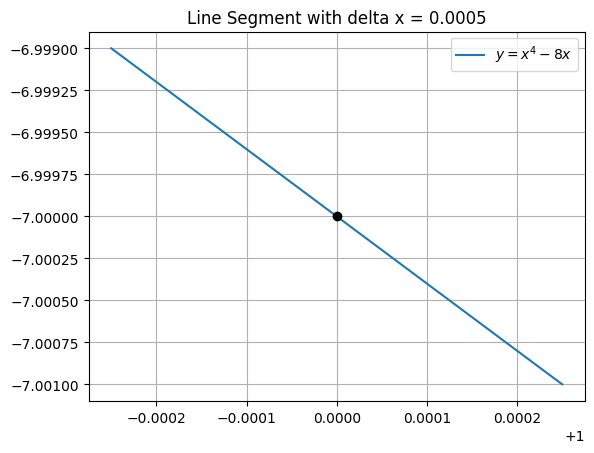

Slope of $y = x^4 - 8x$ at 1:::  -3.9999997499999793


In [11]:
# f'(1) where f(x) = x^4 - 8x

# sequence of smaller and smaller windows
deltas = [0.5, 0.05, 0.005, 0.0005]
x = 1
f_str = r'$y = x^4 - 8x$'
def f(x):
    return x**4 - 8*x

for delta in deltas:
    calc_derivative(f, x, delta, f_str)

As we can see in the sequence above, the slope of the line segment stabilizes to two decimal points at $-3.99$ with a window size (delta x) of $0.005$.

### Problem 10

In [12]:
def generate_example(f, x_list, xl, xr, f_str, granularity=1000):
    x_points = np.linspace(xl, xr, granularity)
    y_points = f_at(f, x_points)

    plt.plot(x_points, y_points, label=f_str)
    
    for x in x_list:
        plt.plot(x, f_at(f, x), 'ko')
    
    plt.grid(True)
    plt.legend()
    plt.show()

##### a) False
In the example below we have the function $t^3 + t - 10^8$, which we can see from the graph has $g{\prime}(t)$ always positive, but the value of $g(214) =  -90,199,442$

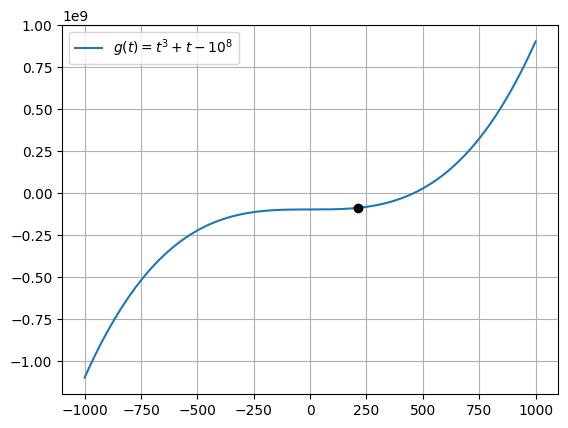

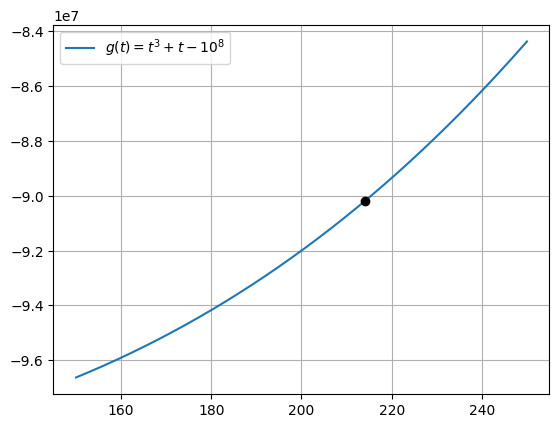

g(214) =  -90199442


In [13]:
def g_a(t):
    return t**3 + t - 10**8

g_str_a = r'$g(t) = t^3 + t - 10^8$'

# Zoomed out to see g'(t) is always positive
generate_example(g_a, [214], -1000, 1000, g_str_a, 10000)

# Zoomed in to see g(214) is negative
generate_example(g_a, [214], 150, 250, g_str_a)
print("g(214) = ", g_a(214))

##### b) True.

If $g^{\prime}(t)$ is always positive, this means that the *rate of change* of $g$ is always positive. Because the function only increases, $g(t+1)$ will always be greater than $g(t)$. We can see an example of this below:

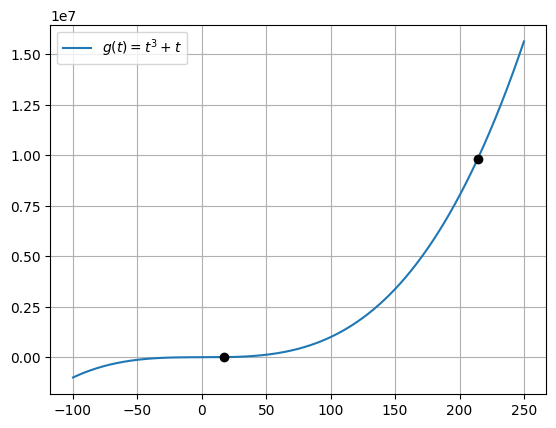

In [14]:
def g_b(t):
    return t**3 + t

g_str_b = r'$g(t) = t^3 + t$'

# example g(214) > g(17)
generate_example(g_b, [17, 214], -100, 250, g_str_b, 10000)

##### c) True

We can think about this problem in terms of rate of change. Speed is a physical form of rate of change calculated as the distance traveled over a given time (Speed = change in distance / change in time). We can then map this concept directly on to the slope of a line on a graph if we put time on the x-axis and distance on the y-axis. Our equation for slope ($Slope = \Delta{y}/\Delta{x}$) would then be $S = \frac{distance_{final} - distance_{start}}{time_{final} - time_{start}}$ on the graph.

Taking this and again mapping it to the statement provided, we can see that if Bill and Samantha maintain the same speed, then this implies the distance they traveled over the same period of time (20 min) is identical $Bill: \frac{distance_{final} - distance_{start}}{20 min} \equiv Samantha: \frac{distance_{final} - distance_{start}}{20 min}$. Therefore, if Bill starts 1 mile behind Samantha and they both travel the same speed for the same amount of time, then Bill will necessarily end 1 mile behind Samantha.

##### d) True
![Graph of Bill and Samantha Speed](./assets/bill_sam_speed.png)

We can think about this problem by graphing Bill and Samantha's trajectory over time. To start at the same point at the same time and end at the same point at the same time, their speeds (the slope of the tangent line on the distance vs. time graph) must necessarily be the same at some point during the trip.

No matter what path either of the lines on the graph take to connect the two points, if the points are connected by both lines, we will necessarily see the parallel tangent lines that we see in the graph above—meaning their speeds were the same at that instant.

## Section 3.3

### Problem 2

In [15]:
# quotient calculation function
h_vals = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

def calc_quotient(f, a, f_str):
    for h in h_vals:
        print(f"Quotient of {f_str} at x = {a} and h = {h}::: ", (f(a + h) - f(a - h)) / (2*h))


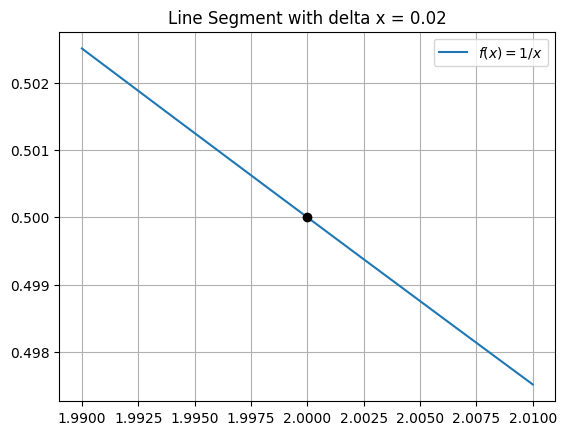

Slope of $f(x) = 1/x$ at 2:::  -0.2500062501562509


Quotient of $f(x) = 1/x$ at x = 2 and h = 0.1:::  -0.2506265664160401
Quotient of $f(x) = 1/x$ at x = 2 and h = 0.01:::  -0.25000625015624833
Quotient of $f(x) = 1/x$ at x = 2 and h = 0.001:::  -0.25000006249997764
Quotient of $f(x) = 1/x$ at x = 2 and h = 0.0001:::  -0.25000000062558314
Quotient of $f(x) = 1/x$ at x = 2 and h = 1e-05:::  -0.2500000000099645
Quotient of $f(x) = 1/x$ at x = 2 and h = 1e-06:::  -0.24999999997943334


In [16]:
# 2a
def f_2a(x):
    return 1/x

x_2a = 2
deltax_2a = 0.02
f_str_2a = r'$f(x) = 1/x$'

calc_derivative(f_2a, x_2a, deltax_2a, f_str_2a)
print("\n")
calc_quotient(f_2a, x_2a, f_str_2a)

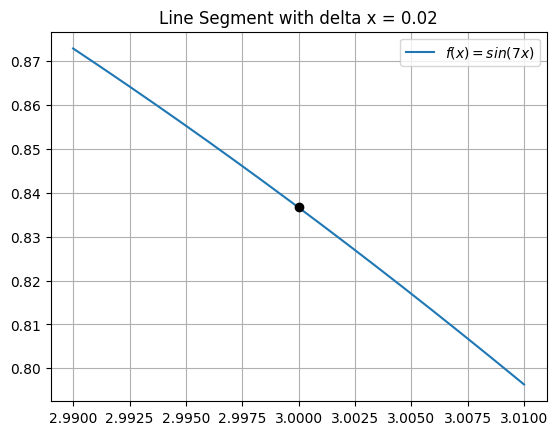

Slope of $f(x) = sin(7x)$ at 3:::  -3.8309744030166777


Quotient of $f(x) = sin(7x)$ at x = 3 and h = 0.1:::  -3.528568772540893
Quotient of $f(x) = sin(7x)$ at x = 3 and h = 0.01:::  -3.830974403016596
Quotient of $f(x) = sin(7x)$ at x = 3 and h = 0.001:::  -3.8340735097894263
Quotient of $f(x) = sin(7x)$ at x = 3 and h = 0.0001:::  -3.8341045084616665
Quotient of $f(x) = sin(7x)$ at x = 3 and h = 1e-05:::  -3.8341048184897804
Quotient of $f(x) = sin(7x)$ at x = 3 and h = 1e-06:::  -3.834104821576201


In [17]:
#2b
def f_2b(x):
    return np.sin(7*x)

x_2b = 3
deltax_2b = 0.02
f_str_2b = r'$f(x) = sin(7x)$'

calc_derivative(f_2b, x_2b, deltax_2b, f_str_2b)
print("\n")
calc_quotient(f_2b, x_2b, f_str_2b)

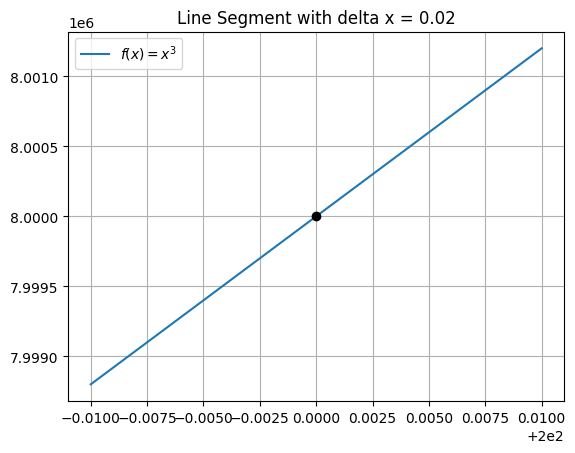

Slope of $f(x) = x^3$ at 200:::  120000.00009999349


Quotient of $f(x) = x^3$ at x = 200 and h = 0.1:::  120000.00999999233
Quotient of $f(x) = x^3$ at x = 200 and h = 0.01:::  120000.00009988435
Quotient of $f(x) = x^3$ at x = 200 and h = 0.001:::  120000.00000186265
Quotient of $f(x) = x^3$ at x = 200 and h = 0.0001:::  120000.00000465661
Quotient of $f(x) = x^3$ at x = 200 and h = 1e-05:::  120000.00006519257
Quotient of $f(x) = x^3$ at x = 200 and h = 1e-06:::  119999.99964609742


In [18]:
#2c
def f_2c(x):
    return x**3

x_2c = 200
deltax_2c = 0.02
f_str_2c = r'$f(x) = x^3$'

calc_derivative(f_2c, x_2c, deltax_2c, f_str_2c)
print("\n")
calc_quotient(f_2c, x_2c, f_str_2c)

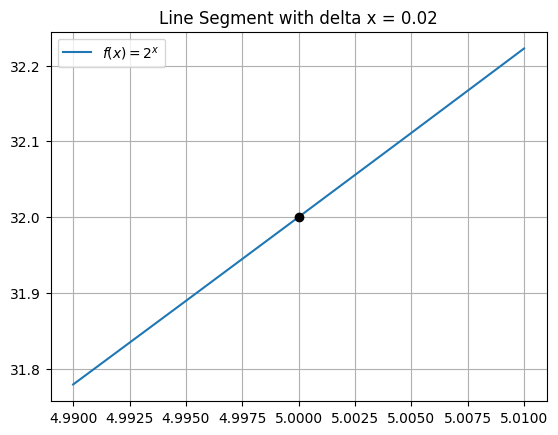

Slope of $f(x) = 2^x$ at 5:::  22.18088739149267


Quotient of $f(x) = 2^x$ at x = 5 and h = 0.1:::  22.198475359917644
Quotient of $f(x) = 2^x$ at x = 5 and h = 0.01:::  22.1808873914922
Quotient of $f(x) = 2^x$ at x = 5 and h = 0.001:::  22.180711554058874
Quotient of $f(x) = 2^x$ at x = 5 and h = 0.0001:::  22.180709795645015
Quotient of $f(x) = 2^x$ at x = 5 and h = 1e-05:::  22.180709777153137
Quotient of $f(x) = 2^x$ at x = 5 and h = 1e-06:::  22.180709779107133


In [19]:
#2d
def f_2d(x):
    return 2**x

x_2d = 5
deltax_2d = 0.02
f_str_2d = r'$f(x) = 2^x$'

calc_derivative(f_2d, x_2d, deltax_2d, f_str_2d)
print("\n")
calc_quotient(f_2d, x_2d, f_str_2d)

### Problem 3

In [20]:
# Q calculation
def calc_Q(f, a):
    q1_vals = []
    q2_vals = []
    h_vals = []
    for k in range(0, 9):
        h = 1 / (2**k)
        q1 = (f(a + h) - f(a - h)) / (2*h)
        q2 = (f(a + h) - f(a)) / h
        q1_vals.append(q1)
        q2_vals.append(q2)
        h_vals.append(h)
        print(f"h::: {h}  |  q1::: {q1}  |  q2:::{q2}" )
    return q1_vals, q2_vals, h_vals

In [21]:
#3a
def f_3a(x):
    return x**3

calc_Q(f_3a, 1);

h::: 1.0  |  q1::: 4.0  |  q2:::7.0
h::: 0.5  |  q1::: 3.25  |  q2:::4.75
h::: 0.25  |  q1::: 3.0625  |  q2:::3.8125
h::: 0.125  |  q1::: 3.015625  |  q2:::3.390625
h::: 0.0625  |  q1::: 3.00390625  |  q2:::3.19140625
h::: 0.03125  |  q1::: 3.0009765625  |  q2:::3.0947265625
h::: 0.015625  |  q1::: 3.000244140625  |  q2:::3.047119140625
h::: 0.0078125  |  q1::: 3.00006103515625  |  q2:::3.02349853515625
h::: 0.00390625  |  q1::: 3.0000152587890625  |  q2:::3.0117340087890625


##### b)
In the table, $Q_1$ stabilizes to 5 digits at 3.00001. $Q_2$ on the other hand only stabalizes to 1 digit at 3.0

##### c)
$Q_1$ is the better estimator. With an $h = 0.125$ it's as good as the best $Q_2$

##### d)

h::: 1.0  |  q1::: 4.0  |  q2:::7.0
h::: 0.5  |  q1::: 3.25  |  q2:::4.75
h::: 0.25  |  q1::: 3.0625  |  q2:::3.8125
h::: 0.125  |  q1::: 3.015625  |  q2:::3.390625
h::: 0.0625  |  q1::: 3.00390625  |  q2:::3.19140625
h::: 0.03125  |  q1::: 3.0009765625  |  q2:::3.0947265625
h::: 0.015625  |  q1::: 3.000244140625  |  q2:::3.047119140625
h::: 0.0078125  |  q1::: 3.00006103515625  |  q2:::3.02349853515625
h::: 0.00390625  |  q1::: 3.0000152587890625  |  q2:::3.0117340087890625


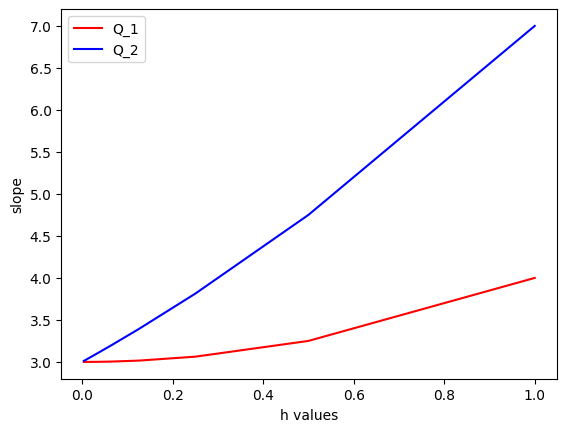

In [22]:
#3d
# aggregation of q1, q2, and h vals in calc_Q function 
# derived from Christopher Taylor's code on Piazza

q1_vals, q2_vals, h_vals = calc_Q(f_3a, 1)
plt.plot(h_vals, q1_vals, color='red', label=r'Q_1')
plt.plot(h_vals, q2_vals, color='blue', label=r'Q_2')
plt.xlabel("h values")
plt.ylabel("slope")
plt.legend()
plt.show()

Looking at the graph of the slope formulas for smaller and smaller values of $h$, we can clearly see that the $Q_1$ slope formula converges to the true slope of 3 much faster than $Q_2$.

### Problem 4

In [23]:
#4
def f_4(x):
    return np.sqrt(x)

calc_Q(f_4, 9);

h::: 1.0  |  q1::: 0.16692526771109462  |  q2:::0.16227766016837952
h::: 0.5  |  q1::: 0.16673105406183764  |  q2:::0.16441400296897601
h::: 0.25  |  q1::: 0.1666827471986032  |  q2:::0.16552506059643868
h::: 0.125  |  q1::: 0.16667068578158784  |  q2:::0.16609194718914466
h::: 0.0625  |  q1::: 0.16666767138179495  |  q2:::0.1663783151691831
h::: 0.03125  |  q1::: 0.16666691784147503  |  q2:::0.16652224137045835
h::: 0.015625  |  q1::: 0.1666667294601183  |  q2:::0.16659439142901533
h::: 0.0078125  |  q1::: 0.16666668236501891  |  q2:::0.16663051337502566
h::: 0.00390625  |  q1::: 0.16666667059126894  |  q2:::0.16664858609942712


### Problem 6

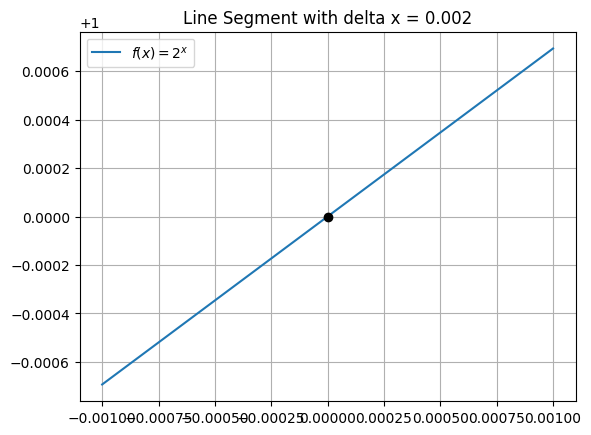

Slope of $f(x) = 2^x$ at 0:::  0.6931472360641178


Quotient of $f(x) = 2^x$ at x = 0 and h = 1.0:::  0.75
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.5:::  0.7071067811865476
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.25:::  0.696621399498013
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.125:::  0.6940147578423459
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.0625:::  0.6933640138307204
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.03125:::  0.6932013850626646
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.015625:::  0.6931607314472004
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.0078125:::  0.6931505682668515
Quotient of $f(x) = 2^x$ at x = 0 and h = 0.00390625:::  0.6931480274857478


In [24]:
#4a
def f_4a(x):
    return 2**x

x_4a = 0
deltax_4a = 0.002
f_str_4a = r'$f(x) = 2^x$'

calc_derivative(f_4a, x_4a, deltax_4a, f_str_4a)
print("\n")
calc_quotient(f_4a, x_4a, f_str_4a)

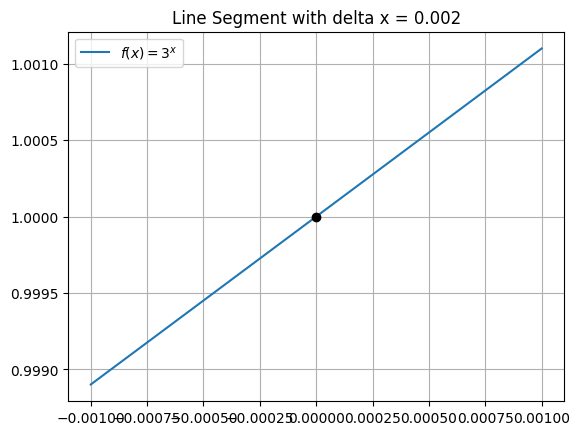

Slope of $f(x) = 3^x$ at 0:::  1.0986125096629218


Quotient of $f(x) = 3^x$ at x = 0 and h = 1.0:::  1.3333333333333333
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.5:::  1.1547005383792515
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.25:::  1.1124766546017997
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.125:::  1.1020685902725655
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.0625:::  1.0994757532311565
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.03125:::  1.0988281166475602
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.015625:::  1.0986662432781422
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.0078125:::  1.098625777171577
Quotient of $f(x) = 3^x$ at x = 0 and h = 0.00390625:::  1.0986156607846596


In [25]:
#4b
def f_4b(x):
    return 3**x

x_4b = 0
deltax_4b = 0.002
f_str_4b = r'$f(x) = 3^x$'

calc_derivative(f_4b, x_4b, deltax_4b, f_str_4b)
print("\n")
calc_quotient(f_4b, x_4b, f_str_4b)

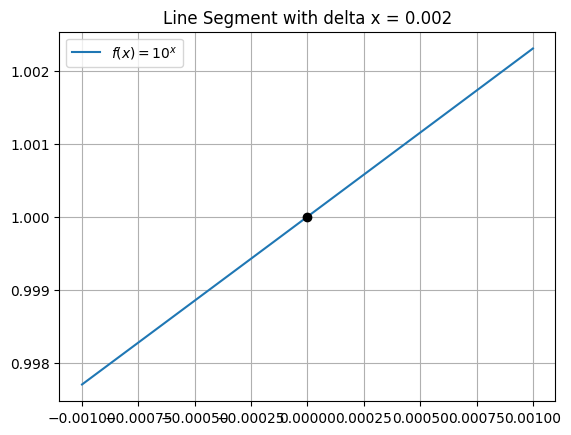

Slope of $f(x) = 10^x$ at 0:::  2.3025871276731724


Quotient of $f(x) = 10^x$ at x = 0 and h = 1.0:::  4.95
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.5:::  2.8460498941515415
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.25:::  2.4318761696971474
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.125:::  2.3345088913234724
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.0625:::  2.3105412906351432
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.03125:::  2.304572598265894
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.015625:::  2.3030818728479616
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.0078125:::  2.302709281929225
Quotient of $f(x) = 10^x$ at x = 0 and h = 0.00390625:::  2.302616139851068


In [26]:
#4c
def f_4c(x):
    return 10**x

x_4c = 0
deltax_4c = 0.002
f_str_4c = r'$f(x) = 10^x$'

calc_derivative(f_4c, x_4c, deltax_4c, f_str_4c)
print("\n")
calc_quotient(f_4c, x_4c, f_str_4c)

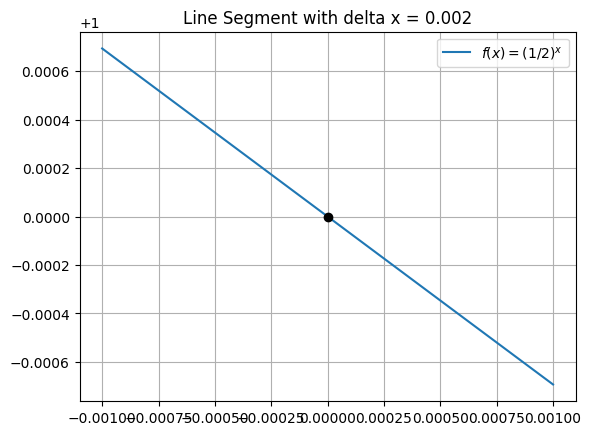

Slope of $f(x) = (1/2)^x$ at 0:::  -0.6931472360641178


Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 1.0:::  -0.75
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.5:::  -0.7071067811865476
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.25:::  -0.696621399498013
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.125:::  -0.6940147578423459
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.0625:::  -0.6933640138307204
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.03125:::  -0.6932013850626646
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.015625:::  -0.6931607314472004
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.0078125:::  -0.6931505682668515
Quotient of $f(x) = (1/2)^x$ at x = 0 and h = 0.00390625:::  -0.6931480274857478


In [27]:
#4d
def f_4d(x):
    return (1/2)**x

x_4d = 0
deltax_4d = 0.002
f_str_4d = r'$f(x) = (1/2)^x$'

calc_derivative(f_4d, x_4d, deltax_4d, f_str_4d)
print("\n")
calc_quotient(f_4d, x_4d, f_str_4d)

### Problem 15

$\frac{f(a + k) - f(a - k)}{2k} = -3$

$f(a + k) - f(a - k) = -3(2k)$

$f(a + k) = -3(2k) + f(a - k)$

???

*I was unsure how to finish solving this question so I reviewed Nandini's answer on Piazza*

It looks like this question wants us to use the microscope equation and solve for $\Delta{b}$.

We have:

$\Delta{b} \approx f^{\prime}(a) * \Delta{x}$

We substitute $-3$ for $f^{\prime}(a)$ and $k$ for $\Delta{x}$

This tells us that $\Delta{b} \approx -3k$

Since this is our change in $b$ we "change $b$ by this term" thus giving us:

$b - 3k$ as the best estimate of $f(a + k)$.

*Note: I'm honestly not totally sure what is happening still in this problem and will need to digest it more to fully understand how this math is being worked out.*

### Problem 16

Based on what we have covered thus far, if $f$ is differentiable at $a$, for small values of $h$ the best estimate of $f^{\prime}(a)$ is:

$\frac{f(a + h) - f(a - h)}{2h}$

h::: 1.0  |  q1::: 4.0  |  q2:::7.0
h::: 0.5  |  q1::: 3.25  |  q2:::4.75
h::: 0.25  |  q1::: 3.0625  |  q2:::3.8125
h::: 0.125  |  q1::: 3.015625  |  q2:::3.390625
h::: 0.0625  |  q1::: 3.00390625  |  q2:::3.19140625
h::: 0.03125  |  q1::: 3.0009765625  |  q2:::3.0947265625
h::: 0.015625  |  q1::: 3.000244140625  |  q2:::3.047119140625
h::: 0.0078125  |  q1::: 3.00006103515625  |  q2:::3.02349853515625
h::: 0.00390625  |  q1::: 3.0000152587890625  |  q2:::3.0117340087890625


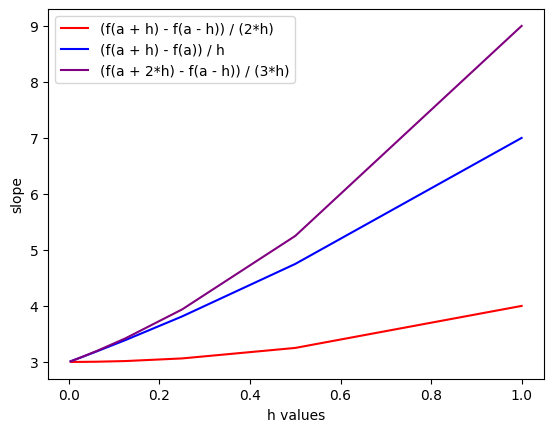

In [28]:
# Q calculation
def calc_Q_extended(f, a):
    q1_vals = []
    q2_vals = []
    q3_vals = []
    q4_vals = []
    h_vals = []
    for k in range(0, 9):
        h = 1 / (2**k)
        q1 = (f(a + h) - f(a - h)) / (2*h)
        q2 = (f(a + h) - f(a)) / h
        q3 = (f(a + h) - f(h)) / h
        q4 = (f(a + 2*h) - f(a - h)) / (3*h)
        q1_vals.append(q1)
        q2_vals.append(q2)
        q3_vals.append(q3)
        q4_vals.append(q4)
        h_vals.append(h)
        print(f"h::: {h}  |  q1::: {q1}  |  q2:::{q2}" )
    return q1_vals, q2_vals, q3_vals, q4_vals, h_vals

q1_vals, q2_vals, q3_vals, q4_vals, h_vals = calc_Q_extended(f_3a, 1)
plt.plot(h_vals, q1_vals, color='red', label=r'(f(a + h) - f(a - h)) / (2*h)')
plt.plot(h_vals, q2_vals, color='blue', label=r'(f(a + h) - f(a)) / h')
# plt.plot(h_vals, q3_vals, color='green', label=r'(f(a + h) - f(h)) / h')
plt.plot(h_vals, q4_vals, color='purple', label=r'(f(a + 2*h) - f(a - h)) / (3*h)')
plt.xlabel("h values")
plt.ylabel("slope")
plt.legend()
plt.show()

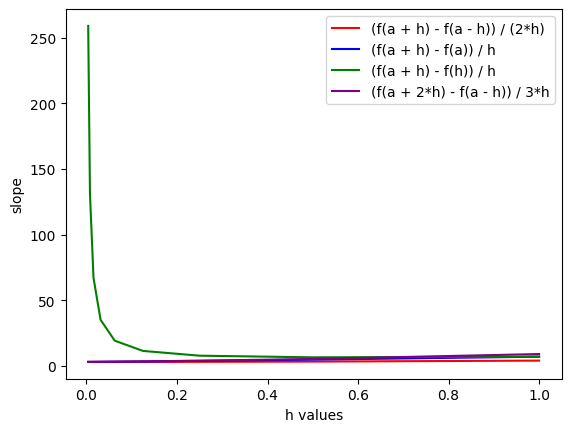

In [29]:
plt.plot(h_vals, q1_vals, color='red', label=r'(f(a + h) - f(a - h)) / (2*h)')
plt.plot(h_vals, q2_vals, color='blue', label=r'(f(a + h) - f(a)) / h')
plt.plot(h_vals, q3_vals, color='green', label=r'(f(a + h) - f(h)) / h')
plt.plot(h_vals, q4_vals, color='purple', label=r'(f(a + 2*h) - f(a - h)) / 3*h')
plt.xlabel("h values")
plt.ylabel("slope")
plt.legend()
plt.show()

As we can see in the graphs above $\frac{f(a + h) - f(a - h)}{(2h)}$ has the best approximation of the slope for all values of $h$. I'm not sure if there is a bug in my code, but it appears $\frac{f(a + h) - f(h)}{h}$ isn't even a valid slope calculation—which may be because of the $f(h)$ term. 